# LSTM model 

In [1]:
import pandas as pd

In [2]:
ex_rate = pd.read_excel("C:/Users/Irfan Shaik/Documents/ExcelR Project/DEXINUS (1).xls")
ex_rate.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [3]:
ex_rate.columns = ['Date','Dexinus']
ex_rate.head()

,Date,Dexinus
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [4]:
ex_rate = ex_rate.interpolate(method ='linear')
ex_rate.head()

,Date,Dexinus
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [5]:
ex_rate.isnull().sum()

Date       0
Dexinus    0
dtype: int64

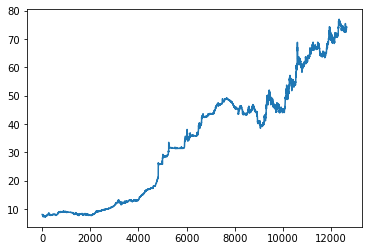

In [6]:
import matplotlib.pyplot as plt
plt.plot(ex_rate.Dexinus)

In [7]:
### LSTM are sensitive to the scale of the data. so we can apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rate = scaler.fit_transform(np.array(ex_rate.Dexinus).reshape(-1,1))
rate

array([[0.01189794],
       [0.01189794],
       [0.01161124],
       ...,
       [0.95957569],
       [0.95971904],
       [0.95971904]])

In [8]:
rate.shape

(12649, 1)

In [9]:
### splitting the data into train and test
training_size = int(len(rate)*0.90)
test_size = len(rate)-training_size
train_data,test_data = rate[0:training_size,:],rate[training_size:len(rate),:1]

In [10]:
len(train_data), len(test_data)

(11384, 1265)

In [11]:
import numpy
# converting an array of values into a dataset matrix
def  create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [12]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape),print(Y_train.shape)

(11283, 100)
(11283,)


(None, None)

In [14]:
X_train.shape,Y_train.shape

((11283, 100), (11283,))

In [15]:
print(X_test.shape), print(Y_test.shape)

(1164, 100)
(1164,)


(None, None)

In [16]:
X_test

array([[0.85994839, 0.85865826, 0.859375  , ..., 0.8702695 , 0.86797592,
        0.87342317],
       [0.85865826, 0.859375  , 0.85751147, ..., 0.86797592, 0.87342317,
        0.87284977],
       [0.859375  , 0.85751147, 0.85708142, ..., 0.87342317, 0.87284977,
        0.8752867 ],
       ...,
       [0.94266055, 0.94108372, 0.94237385, ..., 0.96000573, 0.95971904,
        0.96029243],
       [0.94108372, 0.94237385, 0.94122706, ..., 0.95971904, 0.96029243,
        0.96301606],
       [0.94237385, 0.94122706, 0.94194381, ..., 0.96029243, 0.96301606,
        0.95957569]])

In [17]:
### Reshape input to be [Samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
### create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(150,return_sequences=True))
model.add(LSTM(150))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 150)          91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 150)          180600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs = 10,batch_size = 64,verbose=1)

Epoch 1/10
177/177 [==============================] - 127s 674ms/step - loss: 0.0037 - val_loss: 1.7634e-04
Epoch 2/10
177/177 [==============================] - 115s 648ms/step - loss: 4.4573e-05 - val_loss: 9.5681e-05
Epoch 3/10
177/177 [==============================] - 127s 720ms/step - loss: 4.5321e-05 - val_loss: 1.3081e-04
Epoch 4/10
177/177 [==============================] - 132s 748ms/step - loss: 4.3999e-05 - val_loss: 1.0844e-04
Epoch 5/10
177/177 [==============================] - 125s 704ms/step - loss: 4.2750e-05 - val_loss: 9.0215e-05
Epoch 6/10
177/177 [==============================] - 126s 710ms/step - loss: 4.5988e-05 - val_loss: 1.5498e-04
Epoch 7/10
177/177 [==============================] - 122s 689ms/step - loss: 4.4722e-05 - val_loss: 7.3905e-05
Epoch 8/10
177/177 [==============================] - 129s 731ms/step - loss: 4.8406e-05 - val_loss: 9.3258e-05
Epoch 9/10
177/177 [==============================] - 127s 716ms/step - loss: 5.3483e-05 - val_loss: 9.8790e

In [22]:
### Lets do the prediction and check the performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [23]:
### Trnasform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
train_predict

array([[ 7.4858065],
       [ 7.4831357],
       [ 7.48155  ],
       ...,
       [67.01361  ],
       [67.00528  ],
       [67.004684 ]], dtype=float32)

In [25]:
### Calculate RMSE metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(scaler.inverse_transform(Y_train.reshape(1,-1)).reshape(-1,1),train_predict))

0.40142196589609164

In [26]:
math.sqrt(mean_squared_error(scaler.inverse_transform(Y_test.reshape(1,-1)).reshape(-1,1),test_predict))

0.5712441935553408

In [39]:
def MAPE(org, pred):
    temp = np.abs((org - pred)/org)*100
    return np.mean(temp)

In [40]:
MAPE(scaler.inverse_transform(Y_test.reshape(1,-1)).reshape(-1,1),test_predict)

0.6251984799551656

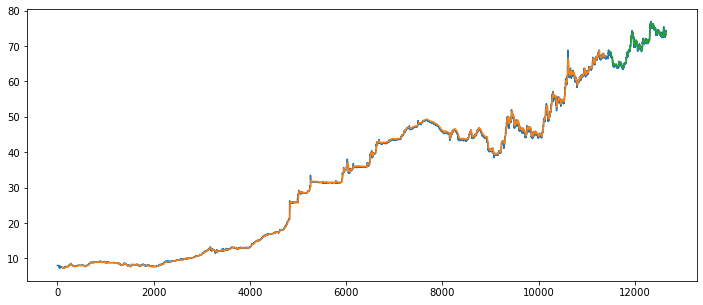

In [27]:
### Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(rate)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(rate)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(rate)-1, :] = test_predict
# Plot baseline and predictions
plt.figure(figsize=(12,5))
plt.plot(scaler.inverse_transform(rate))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

1265

In [29]:
x_input = test_data[1265-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input[:10]

[0.9419438073394496,
 0.9409403669724771,
 0.9407970183486237,
 0.938933486238532,
 0.937643348623853,
 0.9395068807339447,
 0.9413704128440367,
 0.9406536697247706,
 0.9383600917431193,
 0.9362098623853211]

In [31]:
# Demonstrate prediction for next 30 days
from numpy import array
lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.95567125]
101
1 day input [0.94094037 0.94079702 0.93893349 0.93764335 0.93950688 0.94137041
 0.94065367 0.93836009 0.93620986 0.93592317 0.93534977 0.93448968
 0.93965023 0.95656537 0.94911124 0.9475344  0.94122706 0.93950688
 0.94638761 0.94796445 0.94180046 0.94137041 0.93893349 0.93922018
 0.93735665 0.93649656 0.93706995 0.93807339 0.93549312 0.93434633
 0.93649656 0.9375     0.93893349 0.93836009 0.93979358 0.94982798
 0.94538417 0.94796445 0.94868119 0.9475344  0.95040138 0.96272936
 0.96588303 0.96803326 0.97247706 0.97591743 0.97305046 0.96932339
 0.96459289 0.97018349 0.97749427 0.97806766 0.97362385 0.97161697
 0.9684633  0.96602638 0.96473624 0.9587156  0.95771216 0.95513188
 0.95484518 0.95498853 0.95255161 0.94724771 0.94925459 0.94896789
 0.95097477 0.95025803 0.94667431 0.94767775 0.94395069 0.94624427
 0.94380734 0.94079702 0.94137041 0.94022362 0.93922018 0.9375
 0.93506307 0.93800172 0.94094037 0.94294725 0.94352064 0.94151376
 0.94051032 0.94237385 0.9430906  0.9

9 day output [[0.96076304]]
10 day input [0.93592317 0.93534977 0.93448968 0.93965023 0.95656537 0.94911124
 0.9475344  0.94122706 0.93950688 0.94638761 0.94796445 0.94180046
 0.94137041 0.93893349 0.93922018 0.93735665 0.93649656 0.93706995
 0.93807339 0.93549312 0.93434633 0.93649656 0.9375     0.93893349
 0.93836009 0.93979358 0.94982798 0.94538417 0.94796445 0.94868119
 0.9475344  0.95040138 0.96272936 0.96588303 0.96803326 0.97247706
 0.97591743 0.97305046 0.96932339 0.96459289 0.97018349 0.97749427
 0.97806766 0.97362385 0.97161697 0.9684633  0.96602638 0.96473624
 0.9587156  0.95771216 0.95513188 0.95484518 0.95498853 0.95255161
 0.94724771 0.94925459 0.94896789 0.95097477 0.95025803 0.94667431
 0.94767775 0.94395069 0.94624427 0.94380734 0.94079702 0.94137041
 0.94022362 0.93922018 0.9375     0.93506307 0.93800172 0.94094037
 0.94294725 0.94352064 0.94151376 0.94051032 0.94237385 0.9430906
 0.94481078 0.94681766 0.94567087 0.9483945  0.9478211  0.96000573
 0.95971904 0.96029243

17 day output [[0.96216774]]
18 day input [0.93950688 0.94638761 0.94796445 0.94180046 0.94137041 0.93893349
 0.93922018 0.93735665 0.93649656 0.93706995 0.93807339 0.93549312
 0.93434633 0.93649656 0.9375     0.93893349 0.93836009 0.93979358
 0.94982798 0.94538417 0.94796445 0.94868119 0.9475344  0.95040138
 0.96272936 0.96588303 0.96803326 0.97247706 0.97591743 0.97305046
 0.96932339 0.96459289 0.97018349 0.97749427 0.97806766 0.97362385
 0.97161697 0.9684633  0.96602638 0.96473624 0.9587156  0.95771216
 0.95513188 0.95484518 0.95498853 0.95255161 0.94724771 0.94925459
 0.94896789 0.95097477 0.95025803 0.94667431 0.94767775 0.94395069
 0.94624427 0.94380734 0.94079702 0.94137041 0.94022362 0.93922018
 0.9375     0.93506307 0.93800172 0.94094037 0.94294725 0.94352064
 0.94151376 0.94051032 0.94237385 0.9430906  0.94481078 0.94681766
 0.94567087 0.9483945  0.9478211  0.96000573 0.95971904 0.96029243
 0.96301606 0.95957569 0.95971904 0.95971904 0.95567125 0.95703262
 0.95808518 0.958864

26 day output [[0.9637364]]
27 day input [0.93706995 0.93807339 0.93549312 0.93434633 0.93649656 0.9375
 0.93893349 0.93836009 0.93979358 0.94982798 0.94538417 0.94796445
 0.94868119 0.9475344  0.95040138 0.96272936 0.96588303 0.96803326
 0.97247706 0.97591743 0.97305046 0.96932339 0.96459289 0.97018349
 0.97749427 0.97806766 0.97362385 0.97161697 0.9684633  0.96602638
 0.96473624 0.9587156  0.95771216 0.95513188 0.95484518 0.95498853
 0.95255161 0.94724771 0.94925459 0.94896789 0.95097477 0.95025803
 0.94667431 0.94767775 0.94395069 0.94624427 0.94380734 0.94079702
 0.94137041 0.94022362 0.93922018 0.9375     0.93506307 0.93800172
 0.94094037 0.94294725 0.94352064 0.94151376 0.94051032 0.94237385
 0.9430906  0.94481078 0.94681766 0.94567087 0.9483945  0.9478211
 0.96000573 0.95971904 0.96029243 0.96301606 0.95957569 0.95971904
 0.95971904 0.95567125 0.95703262 0.95808518 0.95886451 0.95942819
 0.95983648 0.96014017 0.96037877 0.96057999 0.96076304 0.96093786
 0.96111095 0.96128404 0.9

In [32]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [33]:
import matplotlib.pyplot as plt

In [34]:
len(rate)

12649

In [35]:
rate1 = rate.tolist()
rate1.extend(lst_output)

In [36]:
rate1[:10]

[[0.011897935779816501],
 [0.011897935779816501],
 [0.011611238532110088],
 [0.011754587155963295],
 [0.011611238532110088],
 [0.011611238532110088],
 [0.011611238532110088],
 [0.011611238532110088],
 [0.011611238532110088],
 [0.011611238532110088]]

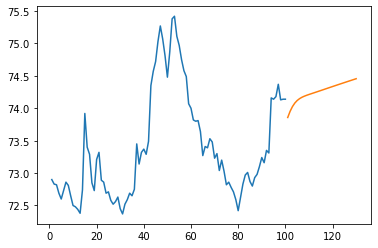

In [37]:
plt.plot(day_new,scaler.inverse_transform(rate[12549:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

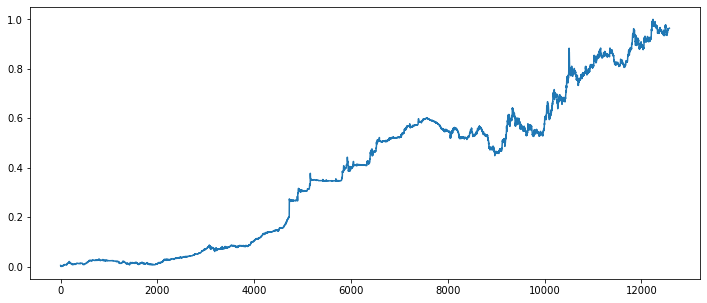

In [38]:
plt.figure(figsize=(12,5))
rate1 = rate.tolist()
rate1.extend(lst_output)
plt.plot(rate1[100:])
plt.show()